<a href="https://colab.research.google.com/github/IvanLudvig/ComputationalMaths/blob/master/utils/cubicspline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solveTriangleSlae(a, b, c, d):
    n = len(b)
    p, q = np.zeros(n), np.zeros(n)
    c = c + [0]
    p[0] = c[0] / b[0]
    q[0] = d[0] / b[0]
    for i in range(1, n):
        j = i - 1
        p[i] = - c[j] / (b[j] + (a[j] * p[j]))
        q[i] = (d[j] - (a[j] * q[j])) / (b[j] + (a[j] * p[j]))

    x = np.zeros(n + 1)

    x[n] = q[-1]
    for i in range(n - 1, 0, -1):
        x[i] = q[i] + (x[i + 1] * p[i])
    return x

In [3]:
class CubicSpline:

    def __init__(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        self.n = len(x)
        self.h = np.diff(x)
        self.h = np.append(self.h, self.h[-1])
        p = self.x.argsort()
        self.x = self.x[p]
        self.y = self.y[p]
        self.a, self.b, self.c, self.d = self.fit()

    def newtonDiff(self, i):
        return (self.y[i] - self.y[i - 1]) / self.h[i]

    def newtonDiff2(self, i):
        return (self.newtonDiff(i) - self.newtonDiff(i - 1)) / (self.h[i] + self.h[i - 1])

    def get_matrix(self):
        a = np.zeros(self.n - 1)
        b = np.zeros(self.n - 1)
        c = np.zeros(self.n - 1)
        d = np.zeros(self.n - 1)
        for i in range(1, self.n - 1):
            j = i - 1
            b[j] = 2
            a[j] = self.h[i] / (self.h[i] + self.h[i + 1])
            c[j] = self.h[i + 1] / (self.h[i + 1] + self.h[i])
            d[j] = 6 * self.newtonDiff2(i + 1)

        return a, b, c, d

    def fit(self):
        am, bm, cm, dm = self.get_matrix()
        N = len(self.x)
        c = solveTriangleSlae(am, bm, cm, dm)
        c = c[:-1]
        a = self.y
        d = np.zeros(N)
        b = np.zeros(N)
        c = np.append(c, 0)
        c = np.append(c, 0)

        for i in range(N - 1, 0, -1):
            d[i] = (c[i] - c[i-1]) / self.h[i]
            b[i] = self.h[i] * (2.0 * c[i] + c[i-1]) / 6.0 + (self.y[i] - self.y[i - 1]) / self.h[i]

        d[0] = c[0] / self.h[0]
        b[0] = self.newtonDiff(1) + (self.h[1] * c[0] / 3)
        return a, b, c, d

    def calculate(self, j, dx):
        return self.a[j] + (self.b[j] * dx) + (self.c[j] * (dx**2) / 2) + (self.d[j] * (dx**3) / 6)

    def interpolate(self, x):
        for i in range(self.n):
            if x <= self.x[i]:
                j = i
                dx = x - self.x[i]
                return self.calculate(j, dx)
        return self.calculate(self.n - 1, x - self.x[self.n - 1])

In [4]:
x = list(range(6, 12+1))
y = [0.00792334, 0.00479672, 0.00172201, -0.0010017, -0.0032621, -0.005055, -0.0064306]

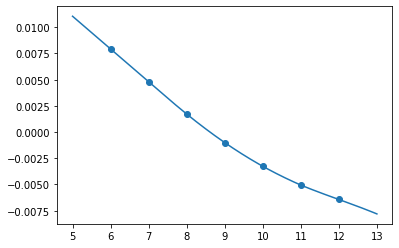

In [5]:
spline = CubicSpline(x, y)

xx = np.linspace(x[0] - 1, x[-1] + 1, 1000)
plt.plot(xx, [spline.interpolate(x) for x in xx])
plt.scatter(x, y)

In [6]:
for u in np.linspace(x[0], x[-1], 1000000):
    if abs(spline.interpolate(u)) < 1e-8:
        print(u)
        break

8.612816612816612
